In [42]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install tensorflow

In [3]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras import utils
( train_X , train_Y ) , ( test_X , test_Y ) = mnist . load_data ()

In [13]:
type(train_X)

numpy.ndarray

In [14]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

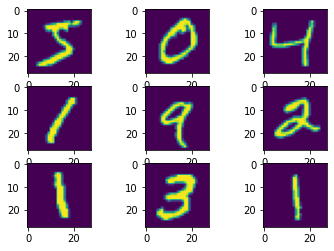

In [15]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(train_X[0])
axarr[0,1].imshow(train_X[1])
axarr[0,2].imshow(train_X[2])
axarr[1,0].imshow(train_X[3])
axarr[1,1].imshow(train_X[4])
axarr[1,2].imshow(train_X[5])
axarr[2,0].imshow(train_X[6])
axarr[2,1].imshow(train_X[7])
axarr[2,2].imshow(train_X[8])

In [17]:
def preprocessing(X_train, Y_train, X_test, Y_test):
    
    #Scale pixels to float values between 0 and 1
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255
    
    #Reshape train matrixes to have a 28 x 28 x 1 matrix where the 28s represent the pixels along the X and Y dimensions
    #and the 1 represents ??? ... Why are we doing this? -- what does the -1 even do here??
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)
    
    #convert output variable to a one-hot vector
    Y_train = utils.np_utils.to_categorical(Y_train, 10, dtype="float32")
    Y_test = utils.np_utils.to_categorical(Y_test, 10, dtype="float32")
    
    return X_train, Y_train, X_test, Y_test

In [18]:
train_X, train_Y, test_X, test_Y = preprocessing(train_X, train_Y, test_X, test_Y)

In [19]:
train_X[1][0][0]

array([0.], dtype=float32)

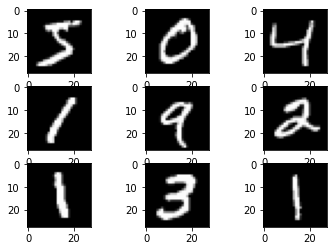

In [20]:
#show new images in grey scale -- questions here, didn't use the additional axis that we created in pre-processing ... (?)
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(train_X[0].squeeze(axis=2), cmap="gray")
axarr[0,1].imshow(train_X[1].squeeze(axis=2), cmap="gray")
axarr[0,2].imshow(train_X[2].squeeze(axis=2), cmap="gray")
axarr[1,0].imshow(train_X[3].squeeze(axis=2), cmap="gray")
axarr[1,1].imshow(train_X[4].squeeze(axis=2), cmap="gray")
axarr[1,2].imshow(train_X[5].squeeze(axis=2), cmap="gray")
axarr[2,0].imshow(train_X[6].squeeze(axis=2), cmap="gray")
axarr[2,1].imshow(train_X[7].squeeze(axis=2), cmap="gray")
axarr[2,2].imshow(train_X[8].squeeze(axis=2), cmap="gray")

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def create_cnn():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))

    # Flatten output
    model.add(Flatten())

    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr =0.01 , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [22]:
model = create_cnn()
model.layers

C:\Users\maxab\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
#Fit model on training data
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
#Call evaluate method to calcualte a model score
score = model.evaluate(test_X, test_Y, verbose=0)
#Report the model accuracy
print(score)

Epoch 1/10
1688/1688 [==============================] - 37s 21ms/step - loss: 0.1758 - accuracy: 0.9456 - val_loss: 0.0667 - val_accuracy: 0.9820
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0553 - val_accuracy: 0.9858
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0520 - val_accuracy: 0.9865
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0449 - val_accuracy: 0.9885
Epoch 6/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0487 - val_accuracy: 0.9870
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 0.0473 -

In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
print("Accuracy: ", score[1])

Accuracy:  0.9883000254631042


In [26]:
#Fit model on training data with 50 epochs and store fit with variable history
history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0554 - val_accuracy: 0.9888
Epoch 2/50
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0544 - val_accuracy: 0.9888
Epoch 3/50
1688/1688 [==============================] - 35s 21ms/step - loss: 7.9779e-04 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9892
Epoch 4/50
1688/1688 [==============================] - 34s 20ms/step - loss: 6.0706e-04 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9890 - ETA: 22s - lo - ETA: 0s - l
Epoch 5/50
1688/1688 [==============================] - 35s 21ms/step - loss: 4.9710e-04 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 0.9888
Epoch 6/50
1688/1688 [==============================] - 35s 21ms/step - loss: 4.3546e-04 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9888
Epoch 7/50
1688/1688 [==============================] - 35s 21ms/step - loss: 

In [38]:
tens_accuracy = []
tens_valaccuracy = []

for i in range(1, 51):
    if i % 10 == 0 or i < 16:
        print(i)
        tens_accuracy.append(history.history['accuracy'][i-1])
        tens_valaccuracy.append(history.history['val_accuracy'][i-1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
20
30
40
50


Text(0.5, 1.0, 'Training Accuracy per 10 Epochs')

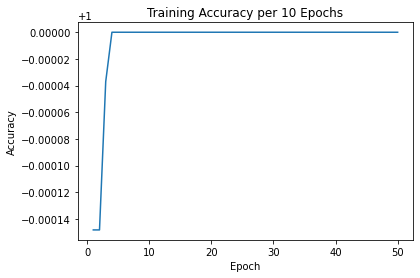

In [39]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50], tens_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per 10 Epochs")

Text(0.5, 1.0, 'Validation Accuracy per 10 Epochs')

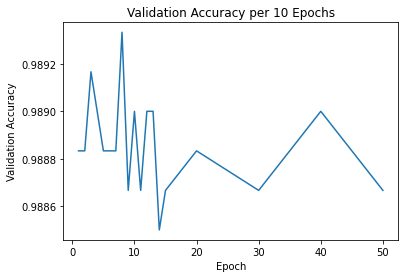

In [40]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50], tens_valaccuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy per 10 Epochs")

The results of the accuracy and validation accuracy plots are somewhat strange. The accuracy plot shows that the accuracy score of the neural network reaches 1 (100% accuracy) after 10 epochs and holds its value for the remaining duration of training. The validation accuracy plot reveals some variation in validation accuracy, which actually decreases at certain increases of epochs, specifically from epoch 10 to epoch 20 and from epoch 40 to epoch 50.

In [221]:
from keras.layers import Dropout

def create_cnn2():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))

    # Flatten output
    model.add(Flatten())

    # Drop-out feature to avoid over-fitting
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr =0.01 , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [230]:
model2 = create_cnn2()
model2.layers

In [231]:
history2 = model2.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.2337 - accuracy: 0.9260 - val_loss: 0.0702 - val_accuracy: 0.9808
Epoch 2/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0956 - accuracy: 0.9698 - val_loss: 0.0533 - val_accuracy: 0.9843
Epoch 3/50
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0696 - accuracy: 0.9784 - val_loss: 0.0545 - val_accuracy: 0.9842
Epoch 4/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0568 - accuracy: 0.9813 - val_loss: 0.0490 - val_accuracy: 0.9875
Epoch 5/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0481 - accuracy: 0.9838 - val_loss: 0.0467 - val_accuracy: 0.9882
Epoch 6/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0404 - accuracy: 0.9866 - val_loss: 0.0431 - val_accuracy: 0.9898
Epoch 7/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0429 -

In [232]:
tens_accuracy = []
tens_valaccuracy = []

for i in range(1, 51):
    if i % 10 == 0:# or i == 1:
        print(i)
        tens_accuracy.append(history2.history['accuracy'][i-1])
        tens_valaccuracy.append(history2.history['val_accuracy'][i-1])

10
20
30
40
50


Text(0.5, 1.0, 'Training Accuracy per 10 Epochs')

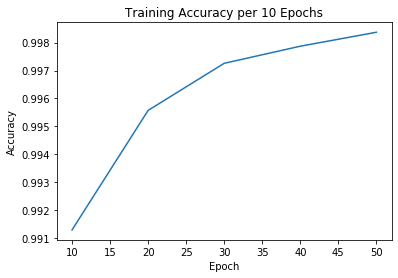

In [233]:
plt.plot([10,20,30,40,50], tens_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per 10 Epochs")

Text(0.5, 1.0, 'Validation Accuracy per 10 Epochs')

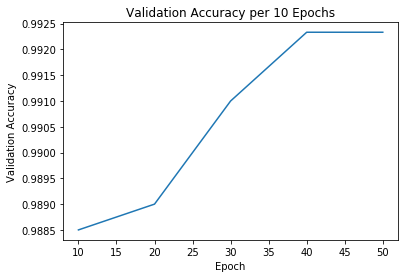

In [234]:
plt.plot([10,20,30,40,50], tens_valaccuracy)
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy per 10 Epochs")

In [235]:
def create_cnn3(rate):
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32 , (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))

    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    
    # Additional Convolution layer
    model.add(Conv2D(64, (3,3) , activation = 'relu' , kernel_initializer = 'he_uniform' , input_shape = (28 , 28 , 1 )))
    
    # Flatten output
    model.add(Flatten())

    # Drop-out feature to avoid over-fitting
    model.add(Dropout(0.5))
    
    # Dense layer of 100 neurons
    model.add(Dense(100 , activation = 'relu' , kernel_initializer = 'he_uniform'))
    model.add(Dense(10 , activation= 'softmax'))

    # initialize optimizer
    opt = SGD(lr = rate , momentum=0.9)

    # compile model
    model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [236]:
model3 = create_cnn3(.01)
model3.layers

In [237]:
model3.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score3 = model3.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score3[1])

Epoch 1/10
1688/1688 [==============================] - 32s 18ms/step - loss: 0.1601 - accuracy: 0.9497 - val_loss: 0.0568 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0446 - val_accuracy: 0.9900
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.0374 - val_accuracy: 0.9903curacy
Epoch 6/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.

In [238]:
model4 = create_cnn3(.1)
model4.layers

In [239]:
model4.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score4 = model4.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score4[1])

Epoch 1/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.8723 - accuracy: 0.7627 - val_loss: 0.7316 - val_accuracy: 0.7852
Epoch 2/10
1688/1688 [==============================] - 28s 17ms/step - loss: 2.1077 - accuracy: 0.2065 - val_loss: 2.3090 - val_accuracy: 0.1045
Epoch 3/10
1688/1688 [==============================] - 33s 20ms/step - loss: 2.3083 - accuracy: 0.1026 - val_loss: 2.3110 - val_accuracy: 0.0960
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 2.3086 - accuracy: 0.1033 - val_loss: 2.3106 - val_accuracy: 0.1045
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 2.3087 - accuracy: 0.1014 - val_loss: 2.3102 - val_accuracy: 0.1113
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 2.3083 - accuracy: 0.1041 - val_loss: 2.3142 - val_accuracy: 0.0960
Epoch 7/10
1688/1688 [==============================] - 35s 21ms/step - loss: 2.3085 - accuracy: 0.1033 - val_loss: 2.3118 -

In [240]:
model5 = create_cnn3(.001)
model5.layers

In [241]:
model5.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score5 = model5.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: ", score5[1])

Epoch 1/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2822 - accuracy: 0.9122 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 2/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1175 - accuracy: 0.9641 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0856 - accuracy: 0.9734 - val_loss: 0.0541 - val_accuracy: 0.9860
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0494 - val_accuracy: 0.9875
Epoch 5/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0495 - val_accuracy: 0.9875
Epoch 7/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0421 -

**Problem 2**

In [4]:
from PIL import Image
img=plt.imread("mona.jpg")

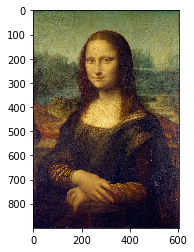

In [5]:
plt.imshow(img)

In [6]:
img.shape

(900, 604, 3)

In [7]:
img[0][0]

array([103, 121,  97], dtype=uint8)

In [8]:
image_coordinates = []
for row_index in range(len(img)):
    for col_index in range(len(img[0])):
        image_coordinates.append((row_index,col_index))

In [9]:
def sample(img, samples):
    samps = []
    for i in range(samples):
        row_index = np.random.random_integers(0, len(img)-1)
        col_index = np.random.random_integers(0, len(img[0])-1)
        samps.append((row_index,col_index))
    return(samps)


In [10]:
training_coordinates = sample(img, 5000)

C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 899 + 1) instead
  after removing the cwd from sys.path.
C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 603 + 1) instead
  """


In [11]:
#What other preprocessing steps are neccessary for random forests inputs?
#Mean subtraction? Standardization? Unit-Normalization?
#Take necessary additional measures and justify them

In [12]:
def output(img, training_coordinates):
    rgb_outputs = []
    for coord_pair in training_coordinates:
        rgb_outputs.append(img[coord_pair[0]][coord_pair[1]])
    return(rgb_outputs)

In [13]:
rgb_outputs = output(img, training_coordinates)

In [29]:
#What other preprocessing steps are necessary for random regression forest outputs?
#Describe them, implement them, and justify your decisions

In [14]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
print(predictions.shape)
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)

(543600, 3)


In [16]:
print(pred_img[0][0])
print(pred_img.shape)

[ 71 107  80]
(900, 604, 3)


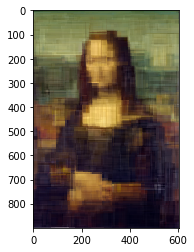

In [17]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)
plt.imshow(pred_img)

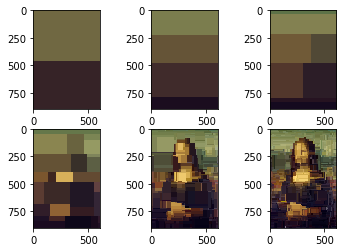

In [19]:
f, axarr = plt.subplots(2,3)
counter = 0
for val in [1,2,3,5,10,15]:
    regr = RandomForestRegressor(n_estimators=1, max_depth = val)
    regr.fit(training_coordinates, rgb_outputs)
    predictions = regr.predict(image_coordinates)
    pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)
    
    if counter == 0:
        axarr[0,0].imshow(pred_img)
    elif counter == 1:
        axarr[0,1].imshow(pred_img)
    elif counter == 2:
        axarr[0,2].imshow(pred_img)
    elif counter == 3:
        axarr[1,0].imshow(pred_img)
    elif counter == 4:
        axarr[1,1].imshow(pred_img)
    elif counter == 5:
        axarr[1,2].imshow(pred_img)
        
    counter += 1

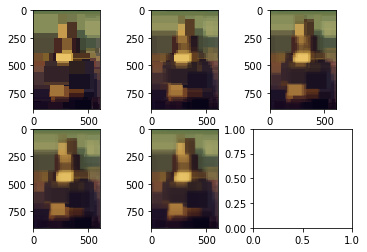

In [20]:
f, axarr = plt.subplots(2,3)
counter = 0
for val in [1,3,5,10,100]:
    regr = RandomForestRegressor(n_estimators=val, max_depth = 7)
    regr.fit(training_coordinates, rgb_outputs)
    predictions = regr.predict(image_coordinates)
    pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)
    
    if counter == 0:
        axarr[0,0].imshow(pred_img)
    elif counter == 1:
        axarr[0,1].imshow(pred_img)
    elif counter == 2:
        axarr[0,2].imshow(pred_img)
    elif counter == 3:
        axarr[1,0].imshow(pred_img)
    elif counter == 4:
        axarr[1,1].imshow(pred_img)
        
    counter += 1

In [22]:
from sklearn.neighbors import KNeighborsRegressor

regr = KNeighborsRegressor(n_neighbors=1)
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)

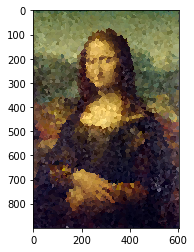

In [23]:
plt.imshow(pred_img)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


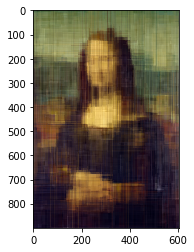

In [34]:
#pruning strategy 1
regr = RandomForestRegressor(max_features = "sqrt")
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)
plt.imshow(pred_img)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


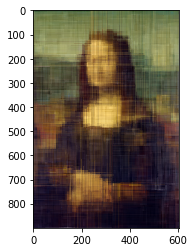

In [32]:
#pruning strategies 2
regr = RandomForestRegressor(max_features = "log2")
regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)
plt.imshow(pred_img)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


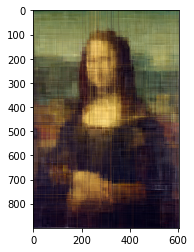

In [47]:
#pruning strategies 3 -- maybe slightly better
regr = RandomForestRegressor(max_features = "log2", oob_score=True)
fit = regr.fit(training_coordinates, rgb_outputs)
predictions = regr.predict(image_coordinates)
pred_img = np.reshape(predictions, (900, 604, 3)).astype(dtype=int)
plt.imshow(pred_img)

In [59]:
tree = regr.estimators_[0].tree_
iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
for node_idx, data in iterator:
    left, right, feature, th, value = data

    # left: index of left child (if any)
    # right: index of right child (if any)
    # feature: index of the feature to check
    # th: the threshold to compare against
    # value: values associated with classes            

    # for classifier, value is 0 except the index of the class to return
    class_idx = np.argmax(value[0])

    if left == -1 and right == -1:
        print('{} LEAF: return class={}'.format(node_idx, class_idx))
    else:
        print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    

0 NODE: if feature[1] < 326.5 then next=1 else next=3424
1 NODE: if feature[1] < 224.5 then next=2 else next=2285
2 NODE: if feature[0] < 213.5 then next=3 else next=518
3 NODE: if feature[0] < 64.5 then next=4 else next=181
4 NODE: if feature[1] < 144.0 then next=5 else next=126
5 NODE: if feature[0] < 14.0 then next=6 else next=23
6 NODE: if feature[1] < 84.0 then next=7 else next=16
7 NODE: if feature[1] < 68.5 then next=8 else next=15
8 NODE: if feature[0] < 7.5 then next=9 else next=14
9 NODE: if feature[0] < 4.0 then next=10 else next=11
10 LEAF: return class=0
11 NODE: if feature[0] < 5.5 then next=12 else next=13
12 LEAF: return class=0
13 LEAF: return class=0
14 LEAF: return class=0
15 LEAF: return class=0
16 NODE: if feature[0] < 10.0 then next=17 else next=22
17 NODE: if feature[0] < 5.5 then next=18 else next=21
18 NODE: if feature[1] < 123.0 then next=19 else next=20
19 LEAF: return class=0
20 LEAF: return class=0
21 LEAF: return class=0
22 LEAF: return class=0
23 NODE: if

2356 LEAF: return class=0
2357 LEAF: return class=0
2358 LEAF: return class=0
2359 NODE: if feature[1] < 239.5 then next=2360 else next=2369
2360 NODE: if feature[0] < 300.0 then next=2361 else next=2366
2361 NODE: if feature[1] < 238.5 then next=2362 else next=2363
2362 LEAF: return class=0
2363 NODE: if feature[0] < 212.5 then next=2364 else next=2365
2364 LEAF: return class=0
2365 LEAF: return class=0
2366 NODE: if feature[0] < 323.0 then next=2367 else next=2368
2367 LEAF: return class=0
2368 LEAF: return class=0
2369 NODE: if feature[0] < 336.0 then next=2370 else next=2371
2370 LEAF: return class=0
2371 LEAF: return class=0
2372 NODE: if feature[1] < 273.5 then next=2373 else next=2522
2373 NODE: if feature[1] < 266.5 then next=2374 else next=2501
2374 NODE: if feature[0] < 304.0 then next=2375 else next=2476
2375 NODE: if feature[0] < 122.5 then next=2376 else next=2415
2376 NODE: if feature[1] < 265.0 then next=2377 else next=2412
2377 NODE: if feature[0] < 56.5 then next=2378 

4746 LEAF: return class=0
4747 NODE: if feature[0] < 316.0 then next=4748 else next=4749
4748 LEAF: return class=0
4749 LEAF: return class=0
4750 NODE: if feature[1] < 602.5 then next=4751 else next=4774
4751 NODE: if feature[0] < 314.0 then next=4752 else next=4755
4752 NODE: if feature[1] < 573.5 then next=4753 else next=4754
4753 LEAF: return class=0
4754 LEAF: return class=0
4755 NODE: if feature[0] < 317.0 then next=4756 else next=4757
4756 LEAF: return class=0
4757 NODE: if feature[0] < 332.0 then next=4758 else next=4765
4758 NODE: if feature[1] < 589.5 then next=4759 else next=4764
4759 NODE: if feature[0] < 321.5 then next=4760 else next=4761
4760 LEAF: return class=0
4761 NODE: if feature[0] < 328.0 then next=4762 else next=4763
4762 LEAF: return class=0
4763 LEAF: return class=0
4764 LEAF: return class=0
4765 NODE: if feature[1] < 568.5 then next=4766 else next=4771
4766 NODE: if feature[0] < 333.5 then next=4767 else next=4768
4767 LEAF: return class=0
4768 NODE: if feature